In [6]:
# Importer les librairies et charger les données

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données météo
df_weather = pd.read_csv('../data/raw/weather_forecast_6days.csv')
df_cities = pd.read_csv('../data/raw/cities_coordinates.csv')

print(f"📊 Données chargées :")
print(f"   - {len(df_weather)} enregistrements météo")
print(f"   - {df_weather['city'].nunique()} villes")
print(f"   - {df_weather['day'].nunique()} jours de prévisions")

# Aperçu des données
print("\n🔍 Aperçu des données météo :")
display(df_weather.head())

📊 Données chargées :
   - 210 enregistrements météo
   - 35 villes
   - 6 jours de prévisions

🔍 Aperçu des données météo :


,city_id,city,latitude,longitude,day,date,temp_min,temp_max,temp_avg,humidity,pop,rain,wind_speed,clouds,weather_description
0,1,Mont Saint Michel,48.635954,-1.51146,1,2025-11-07,12.51,13.23,12.936667,93.666667,100.0,2.22,5.41000,100.000,légère pluie
1,1,Mont Saint Michel,48.635954,-1.51146,2,2025-11-08,9.96,14.74,11.681250,88.250000,76.0,0.16,3.27875,72.375,légère pluie
2,1,Mont Saint Michel,48.635954,-1.51146,3,2025-11-09,7.31,15.09,11.020000,83.875000,0.0,0.00,4.65000,71.250,couvert
3,1,Mont Saint Michel,48.635954,-1.51146,4,2025-11-10,9.58,14.17,11.975000,89.000000,100.0,11.55,5.80625,99.125,pluie modérée
4,1,Mont Saint Michel,48.635954,-1.51146,5,2025-11-11,9.17,14.46,11.546250,89.375000,0.0,0.00,6.12625,97.125,couvert



📈 Statistiques des variables météo :
         temp_avg         pop        rain    humidity  wind_speed      clouds
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000
mean    11.705332   19.771429    1.276095   77.854683    2.948557   70.535476
std      2.498163   36.617447    4.583506    8.402742    1.983227   24.115060
min      2.123333    0.000000    0.000000   59.800000    0.606667    1.000000
25%     10.253063    0.000000    0.000000   71.375000    1.356562   56.906250
50%     11.966875    0.000000    0.000000   78.666667    2.276875   74.312500
75%     13.345625   20.000000    0.110000   83.875000    4.042813   90.118750
max     16.806667  100.000000   38.810000   96.000000    9.264000  100.000000


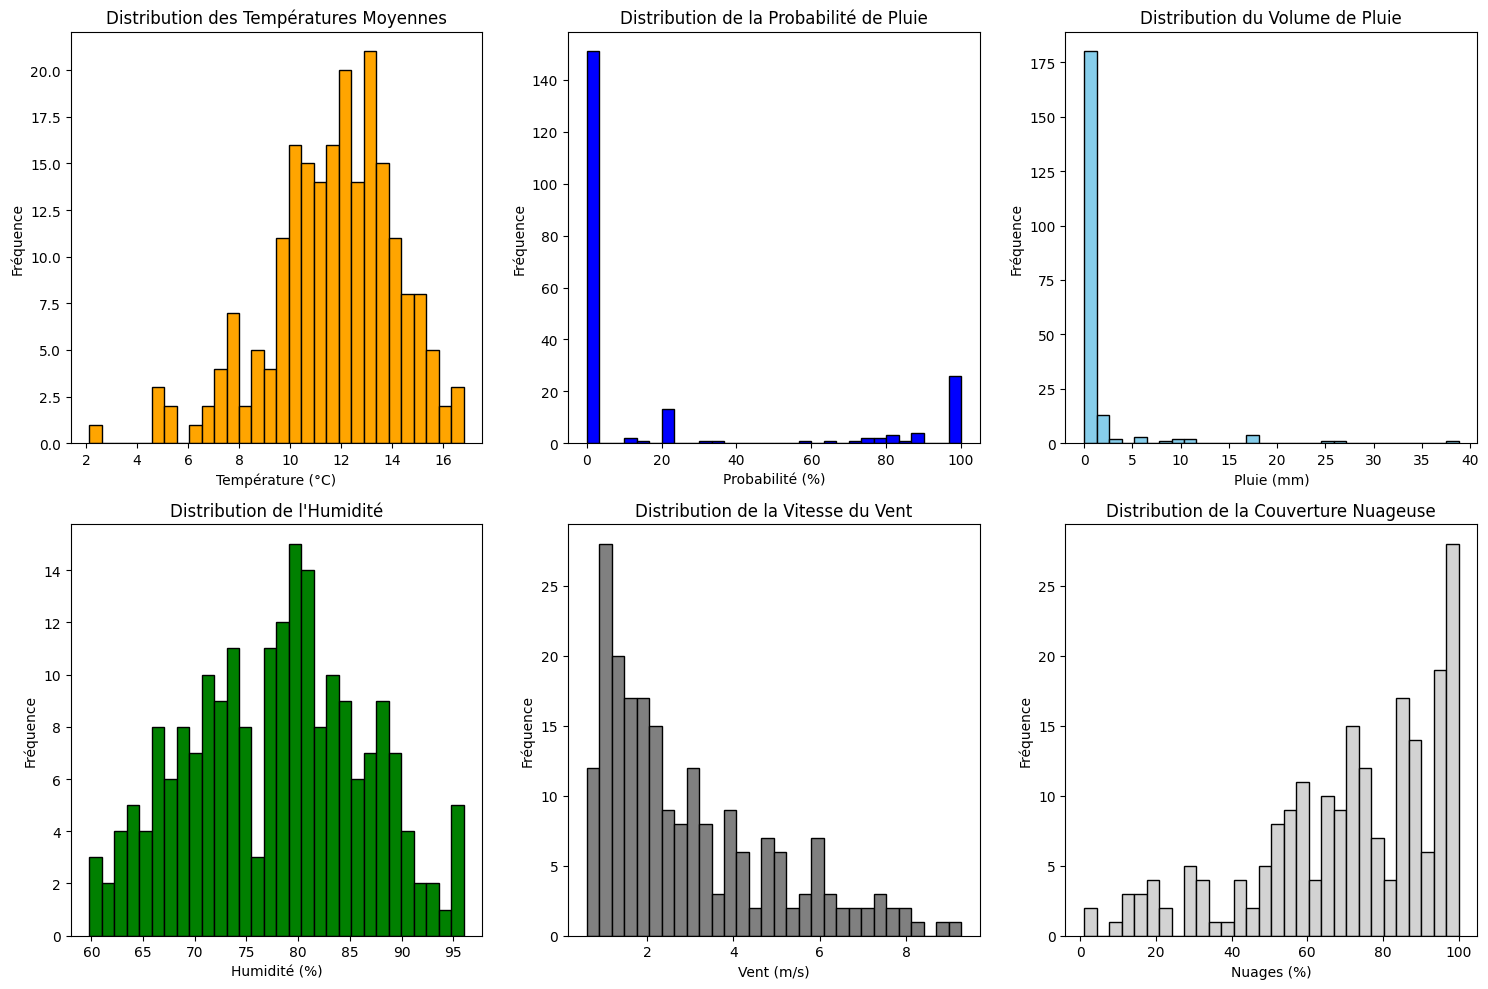


✅ Graphique sauvegardé : ../visualizations/weather_distributions.png


In [8]:
# Analyser les distributions des variables météo

# Statistiques descriptives
print("\n📈 Statistiques des variables météo :")
print(df_weather[['temp_avg', 'pop', 'rain', 'humidity', 'wind_speed', 'clouds']].describe())

# Visualiser les distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Température
axes[0, 0].hist(df_weather['temp_avg'], bins=30, color='orange', edgecolor='black')
axes[0, 0].set_title('Distribution des Températures Moyennes')
axes[0, 0].set_xlabel('Température (°C)')
axes[0, 0].set_ylabel('Fréquence')

# Probabilité de pluie
axes[0, 1].hist(df_weather['pop'], bins=30, color='blue', edgecolor='black')
axes[0, 1].set_title('Distribution de la Probabilité de Pluie')
axes[0, 1].set_xlabel('Probabilité (%)')
axes[0, 1].set_ylabel('Fréquence')

# Volume de pluie
axes[0, 2].hist(df_weather['rain'], bins=30, color='skyblue', edgecolor='black')
axes[0, 2].set_title('Distribution du Volume de Pluie')
axes[0, 2].set_xlabel('Pluie (mm)')
axes[0, 2].set_ylabel('Fréquence')

# Humidité
axes[1, 0].hist(df_weather['humidity'], bins=30, color='green', edgecolor='black')
axes[1, 0].set_title('Distribution de l\'Humidité')
axes[1, 0].set_xlabel('Humidité (%)')
axes[1, 0].set_ylabel('Fréquence')

# Vent
axes[1, 1].hist(df_weather['wind_speed'], bins=30, color='gray', edgecolor='black')
axes[1, 1].set_title('Distribution de la Vitesse du Vent')
axes[1, 1].set_xlabel('Vent (m/s)')
axes[1, 1].set_ylabel('Fréquence')

# Couverture nuageuse
axes[1, 2].hist(df_weather['clouds'], bins=30, color='lightgray', edgecolor='black')
axes[1, 2].set_title('Distribution de la Couverture Nuageuse')
axes[1, 2].set_xlabel('Nuages (%)')
axes[1, 2].set_ylabel('Fréquence')

plt.tight_layout()
plt.savefig('../visualizations/weather_distributions.png', dpi=150)
plt.show()

print("\n✅ Graphique sauvegardé : ../visualizations/weather_distributions.png")

In [9]:
# Définir les critères de scoring

"""
CRITÈRES DE "BEAU TEMPS" 🌤️

Un beau temps pour des vacances est défini par :
1. Température agréable (18-28°C) → +points
2. Faible probabilité de pluie (< 30%) → +points
3. Peu ou pas de pluie (< 2mm) → +points
4. Humidité modérée (40-70%) → +points
5. Vent faible (< 5 m/s) → +points
6. Ciel dégagé (< 50% nuages) → +points
"""

def calculate_weather_score(row):
    """
    Calcule un score météo de 0 à 100 pour une journée.
    
    Args:
        row: Ligne du DataFrame contenant les données météo
        
    Returns:
        float: Score entre 0 (très mauvais) et 100 (parfait)
    """
    score = 0
    
    # 1. Score Température (0-25 points)
    # Température idéale : 20-25°C
    temp = row['temp_avg']
    if 20 <= temp <= 25:
        score += 25
    elif 18 <= temp < 20 or 25 < temp <= 28:
        score += 20
    elif 15 <= temp < 18 or 28 < temp <= 30:
        score += 15
    elif 12 <= temp < 15 or 30 < temp <= 32:
        score += 10
    elif temp < 12 or temp > 32:
        score += 0
    
    # 2. Score Pluie - Probabilité (0-25 points)
    pop = row['pop']
    if pop < 10:
        score += 25
    elif 10 <= pop < 30:
        score += 20
    elif 30 <= pop < 50:
        score += 10
    elif 50 <= pop < 70:
        score += 5
    else:  # pop >= 70
        score += 0
    
    # 3. Score Pluie - Volume (0-20 points)
    rain = row['rain']
    if rain == 0:
        score += 20
    elif rain < 2:
        score += 15
    elif 2 <= rain < 5:
        score += 10
    elif 5 <= rain < 10:
        score += 5
    else:  # rain >= 10
        score += 0
    
    # 4. Score Humidité (0-10 points)
    humidity = row['humidity']
    if 40 <= humidity <= 60:
        score += 10
    elif 30 <= humidity < 40 or 60 < humidity <= 70:
        score += 7
    elif 20 <= humidity < 30 or 70 < humidity <= 80:
        score += 5
    else:
        score += 0
    
    # 5. Score Vent (0-10 points)
    wind = row['wind_speed']
    if wind < 3:
        score += 10
    elif 3 <= wind < 5:
        score += 7
    elif 5 <= wind < 8:
        score += 5
    elif 8 <= wind < 12:
        score += 3
    else:  # wind >= 12
        score += 0
    
    # 6. Score Nuages (0-10 points)
    clouds = row['clouds']
    if clouds < 20:
        score += 10
    elif 20 <= clouds < 40:
        score += 8
    elif 40 <= clouds < 60:
        score += 6
    elif 60 <= clouds < 80:
        score += 4
    else:  # clouds >= 80
        score += 2
    
    return score

# Afficher les pondérations
print("\n⚖️ PONDÉRATION DES CRITÈRES :")
print("   - Température :        25 points (25%)")
print("   - Probabilité pluie :  25 points (25%)")
print("   - Volume de pluie :    20 points (20%)")
print("   - Humidité :           10 points (10%)")
print("   - Vent :               10 points (10%)")
print("   - Couverture nuageuse: 10 points (10%)")
print("   ─────────────────────────────────────")
print("   TOTAL :               100 points (100%)")


⚖️ PONDÉRATION DES CRITÈRES :
   - Température :        25 points (25%)
   - Probabilité pluie :  25 points (25%)
   - Volume de pluie :    20 points (20%)
   - Humidité :           10 points (10%)
   - Vent :               10 points (10%)
   - Couverture nuageuse: 10 points (10%)
   ─────────────────────────────────────
   TOTAL :               100 points (100%)


In [11]:
# Appliquer la fonction de scoring

# Calculer le score pour chaque jour de chaque ville
print("\n🔢 Calcul des scores météo...")

df_weather['weather_score'] = df_weather.apply(calculate_weather_score, axis=1)

print("✅ Scores calculés !")

# Afficher quelques exemples
print("\n📊 Exemples de scores :")
display(df_weather[['city', 'day', 'date', 'temp_avg', 'pop', 'rain', 'weather_score']].head(15))

# Statistiques des scores
print("\n📈 Statistiques des scores :")
print(df_weather['weather_score'].describe())


🔢 Calcul des scores météo...
✅ Scores calculés !

📊 Exemples de scores :


,city,day,date,temp_avg,pop,rain,weather_score
0,Mont Saint Michel,1,2025-11-07,12.936667,100.0,2.22,27
1,Mont Saint Michel,2,2025-11-08,11.681250,76.0,0.16,26
2,Mont Saint Michel,3,2025-11-09,11.020000,0.0,0.00,56
3,Mont Saint Michel,4,2025-11-10,11.975000,100.0,11.55,7
4,Mont Saint Michel,5,2025-11-11,11.546250,0.0,0.00,52
5,Mont Saint Michel,6,2025-11-12,11.716000,0.0,0.00,57
6,St Malo,1,2025-11-07,13.196667,100.0,1.87,32
7,St Malo,2,2025-11-08,12.408750,20.0,0.13,56
8,St Malo,3,2025-11-09,11.921250,0.0,0.00,54
9,St Malo,4,2025-11-10,12.983750,100.0,8.64,22



📈 Statistiques des scores :
count    210.000000
mean      58.533333
std       18.532561
min        5.000000
25%       54.000000
50%       64.000000
75%       73.000000
max       87.000000
Name: weather_score, dtype: float64


In [12]:
# Calculer le score moyen par ville

# Agréger par ville : score moyen sur 6 jours
city_scores = df_weather.groupby('city').agg({
    'weather_score': 'mean',
    'temp_avg': 'mean',
    'pop': 'mean',
    'rain': 'sum',  # Total de pluie sur 6 jours
    'humidity': 'mean',
    'wind_speed': 'mean',
    'clouds': 'mean',
    'city_id': 'first',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

# Renommer la colonne
city_scores.rename(columns={'weather_score': 'avg_weather_score'}, inplace=True)

# Arrondir les scores
city_scores['avg_weather_score'] = city_scores['avg_weather_score'].round(2)
city_scores['temp_avg'] = city_scores['temp_avg'].round(1)
city_scores['pop'] = city_scores['pop'].round(1)
city_scores['rain'] = city_scores['rain'].round(2)

# Trier par score décroissant
city_scores = city_scores.sort_values('avg_weather_score', ascending=False).reset_index(drop=True)

print("\n🏆 Classement des villes par score météo :")
display(city_scores[['city', 'avg_weather_score', 'temp_avg', 'pop', 'rain']].head(10))


🏆 Classement des villes par score météo :


,city,avg_weather_score,temp_avg,pop,rain
0,Aix en Provence,76.33,13.0,0.0,0.00
1,Marseille,76.17,15.1,3.3,0.15
2,Bormes les Mimosas,76.00,13.0,0.0,0.00
3,Cassis,73.67,14.3,7.2,0.34
4,Avignon,71.83,12.9,0.0,0.00
5,Nimes,71.17,12.8,0.0,0.00
6,Aigues Mortes,70.17,14.0,14.8,1.38
7,Saintes Maries de la mer,70.00,14.3,12.7,1.10
8,Collioure,68.00,14.2,16.7,10.73
9,Uzes,65.67,11.9,0.2,0.00


In [13]:
# Sélectionner les 5 meilleures destinations

top5_cities = city_scores.head(5).copy()

print("\n" + "="*60)
print("🌟 TOP 5 DES MEILLEURES DESTINATIONS MÉTÉO 🌟")
print("="*60)

for idx, row in top5_cities.iterrows():
    print(f"\n{idx+1}. {row['city']}")
    print(f"   ⭐ Score météo :        {row['avg_weather_score']:.1f}/100")
    print(f"   🌡️  Température moyenne : {row['temp_avg']:.1f}°C")
    print(f"   🌧️  Probabilité pluie :   {row['pop']:.1f}%")
    print(f"   💧 Pluie totale (6j) :   {row['rain']:.1f} mm")
    print(f"   💨 Vent moyen :          {row['wind_speed']:.1f} m/s")
    print(f"   ☁️  Nuages moyens :       {row['clouds']:.0f}%")

print("\n" + "="*60)


🌟 TOP 5 DES MEILLEURES DESTINATIONS MÉTÉO 🌟

1. Aix en Provence
   ⭐ Score météo :        76.3/100
   🌡️  Température moyenne : 13.0°C
   🌧️  Probabilité pluie :   0.0%
   💧 Pluie totale (6j) :   0.0 mm
   💨 Vent moyen :          1.5 m/s
   ☁️  Nuages moyens :       59%

2. Marseille
   ⭐ Score météo :        76.2/100
   🌡️  Température moyenne : 15.1°C
   🌧️  Probabilité pluie :   3.3%
   💧 Pluie totale (6j) :   0.1 mm
   💨 Vent moyen :          3.0 m/s
   ☁️  Nuages moyens :       61%

3. Bormes les Mimosas
   ⭐ Score météo :        76.0/100
   🌡️  Température moyenne : 13.0°C
   🌧️  Probabilité pluie :   0.0%
   💧 Pluie totale (6j) :   0.0 mm
   💨 Vent moyen :          2.3 m/s
   ☁️  Nuages moyens :       50%

4. Cassis
   ⭐ Score météo :        73.7/100
   🌡️  Température moyenne : 14.3°C
   🌧️  Probabilité pluie :   7.2%
   💧 Pluie totale (6j) :   0.3 mm
   💨 Vent moyen :          2.7 m/s
   ☁️  Nuages moyens :       57%

5. Avignon
   ⭐ Score météo :        71.8/100
   🌡️  Tempé

In [15]:
# Sauvegarder les résultats

# Sauvegarder le classement complet
city_scores.to_csv('../data/processed/city_weather_scores.csv', index=False)
print("\n✅ Classement complet sauvegardé : ../data/processed/city_weather_scores.csv")

# Sauvegarder le Top 5
top5_cities.to_csv('../data/processed/top5_destinations.csv', index=False)
print("✅ Top 5 sauvegardé : ../data/processed/top5_destinations.csv")

# Créer le dossier processed s'il n'existe pas
import os
os.makedirs('../data/processed', exist_ok=True)


✅ Classement complet sauvegardé : ../data/processed/city_weather_scores.csv
✅ Top 5 sauvegardé : ../data/processed/top5_destinations.csv


C:\Users\Emeline\AppData\Local\Temp\ipykernel_4024\1743880957.py:22: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Emeline\AppData\Local\Temp\ipykernel_4024\1743880957.py:23: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.savefig('../visualizations/top10_weather_scores.png', dpi=150, bbox_inches='tight')
c:\Users\Emeline\Documents\_DEV\6_Projet_Kayak\kayak_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


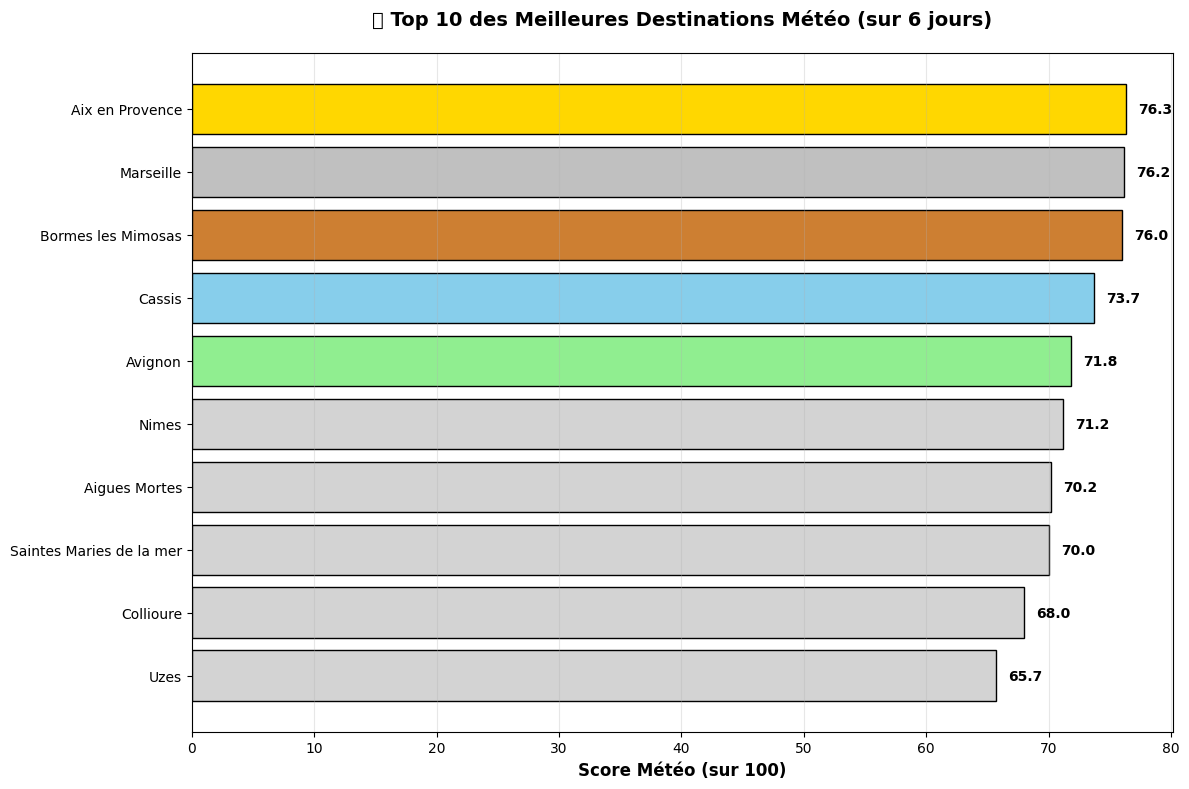

✅ Graphique sauvegardé : ../visualizations/top10_weather_scores.png


In [17]:
# Graphique en barres du Top 10

# Top 10 pour la visualisation
top10 = city_scores.head(10)

# Créer le graphique
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['gold', 'silver', '#CD7F32', 'skyblue', 'lightgreen'] + ['lightgray']*5
bars = ax.barh(top10['city'], top10['avg_weather_score'], color=colors, edgecolor='black')

# Ajouter les valeurs sur les barres
for i, (score, city) in enumerate(zip(top10['avg_weather_score'], top10['city'])):
    ax.text(score + 1, i, f'{score:.1f}', va='center', fontweight='bold')

ax.set_xlabel('Score Météo (sur 100)', fontsize=12, fontweight='bold')
ax.set_title('🏆 Top 10 des Meilleures Destinations Météo (sur 6 jours)', 
             fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()  # Meilleur score en haut
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/top10_weather_scores.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : ../visualizations/top10_weather_scores.png")

In [18]:
# Carte interactive du Top 5

# Créer la carte avec Plotly
fig = go.Figure()

# Ajouter toutes les villes en gris (fond)
fig.add_trace(go.Scattergeo(
    lon=city_scores['longitude'],
    lat=city_scores['latitude'],
    text=city_scores['city'],
    mode='markers',
    marker=dict(
        size=8,
        color='lightgray',
        line=dict(width=0.5, color='white')
    ),
    name='Autres villes',
    hovertemplate='<b>%{text}</b><br>Score: %{customdata:.1f}<extra></extra>',
    customdata=city_scores['avg_weather_score']
))

# Ajouter le Top 5 en surbrillance
colors_top5 = ['gold', 'silver', '#CD7F32', '#4169E1', '#32CD32']

for idx, row in top5_cities.iterrows():
    fig.add_trace(go.Scattergeo(
        lon=[row['longitude']],
        lat=[row['latitude']],
        text=[row['city']],
        mode='markers+text',
        marker=dict(
            size=20,
            color=colors_top5[idx],
            line=dict(width=2, color='white'),
            symbol='star'
        ),
        textposition='top center',
        textfont=dict(size=12, color='black', family='Arial Black'),
        name=f"#{idx+1} {row['city']}",
        hovertemplate=f"<b>#{idx+1} {row['city']}</b><br>" +
                      f"Score: {row['avg_weather_score']:.1f}/100<br>" +
                      f"Temp: {row['temp_avg']:.1f}°C<br>" +
                      f"Pluie: {row['pop']:.0f}%<br>" +
                      "<extra></extra>"
    ))

# Configuration de la carte
fig.update_geos(
    scope='europe',
    center=dict(lon=2.5, lat=46.5),
    projection_scale=5,
    showcountries=True,
    countrycolor='lightgray',
    showcoastlines=True,
    coastlinecolor='gray',
    showland=True,
    landcolor='white',
    showlakes=True,
    lakecolor='lightblue'
)

fig.update_layout(
    title={
        'text': '🌟 Top 5 des Meilleures Destinations Météo en France 🌟',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'color': 'darkblue', 'family': 'Arial Black'}
    },
    height=800,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(255, 255, 255, 0.8)'
    )
)

fig.write_html('../visualizations/top5_destinations_map.html')
fig.show()

print("✅ Carte interactive sauvegardée : ../visualizations/top5_destinations_map.html")

✅ Carte interactive sauvegardée : ../visualizations/top5_destinations_map.html


C:\Users\Emeline\AppData\Local\Temp\ipykernel_4024\3523636345.py:32: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

C:\Users\Emeline\AppData\Local\Temp\ipykernel_4024\3523636345.py:33: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

c:\Users\Emeline\Documents\_DEV\6_Projet_Kayak\kayak_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



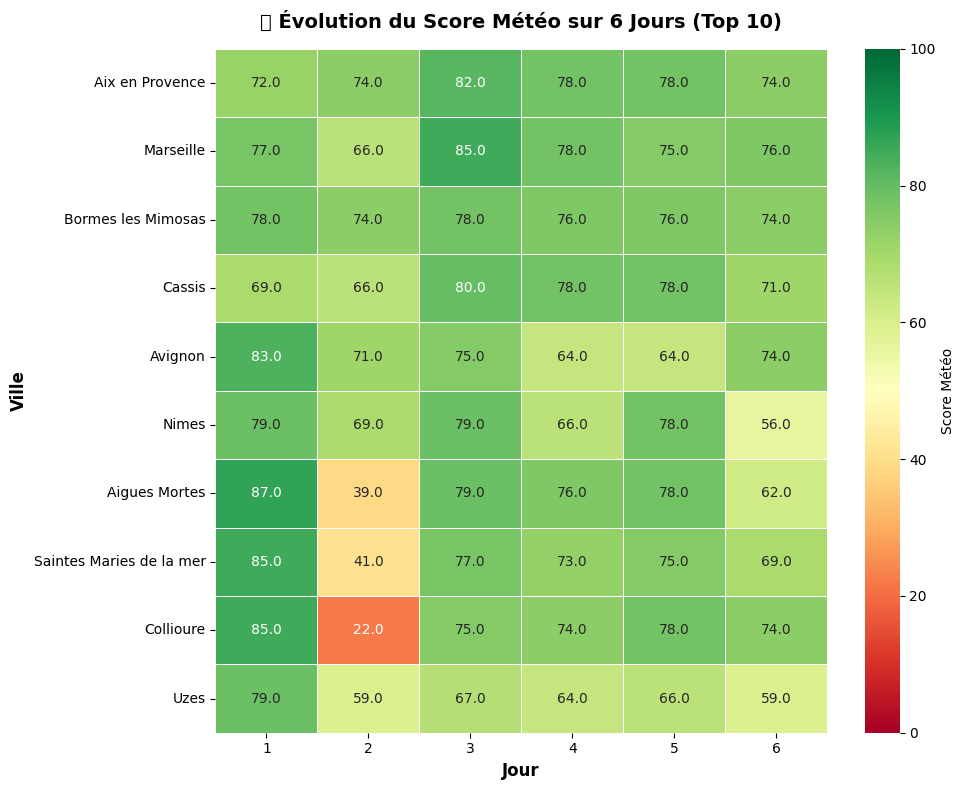

✅ Heatmap sauvegardée : ../visualizations/weather_scores_heatmap.png


In [19]:
# Heatmap : Évolution des scores sur 6 jours

# Créer un pivot table pour la heatmap
pivot_scores = df_weather.pivot_table(
    values='weather_score',
    index='city',
    columns='day',
    aggfunc='mean'
)

# Filtrer sur le Top 10 pour la lisibilité
top10_cities_list = city_scores.head(10)['city'].tolist()
pivot_top10 = pivot_scores.loc[top10_cities_list]

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_top10,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    cbar_kws={'label': 'Score Météo'},
    linewidths=0.5,
    vmin=0,
    vmax=100
)

plt.title('📊 Évolution du Score Météo sur 6 Jours (Top 10)', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Jour', fontsize=12, fontweight='bold')
plt.ylabel('Ville', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualizations/weather_scores_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Heatmap sauvegardée : ../visualizations/weather_scores_heatmap.png")

In [20]:
# Comparaison détaillée du Top 5

# Radar chart pour comparer les critères du Top 5
import plotly.graph_objects as go

categories = ['Température', 'Pas de pluie', 'Humidité OK', 'Vent faible', 'Ciel dégagé']

fig = go.Figure()

for idx, row in top5_cities.iterrows():
    # Normaliser les valeurs entre 0 et 100
    temp_score = 100 if 20 <= row['temp_avg'] <= 25 else max(0, 100 - abs(row['temp_avg'] - 22.5) * 5)
    rain_score = max(0, 100 - row['pop'])
    humidity_score = 100 if 40 <= row['humidity'] <= 60 else max(0, 100 - abs(row['humidity'] - 50))
    wind_score = max(0, 100 - row['wind_speed'] * 10)
    cloud_score = max(0, 100 - row['clouds'])
    
    values = [temp_score, rain_score, humidity_score, wind_score, cloud_score]
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name=row['city']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )),
    title='🔍 Comparaison Détaillée du Top 5 (Critères Météo)',
    showlegend=True,
    height=600
)

fig.write_html('../visualizations/top5_radar_comparison.html')
fig.show()

print("✅ Radar chart sauvegardé : ../visualizations/top5_radar_comparison.html")

✅ Radar chart sauvegardé : ../visualizations/top5_radar_comparison.html
